In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

## Load data file into dataframe

In [35]:
# LOAD DATA FROM ALL FILES IN THE ROOT FOLDER. IF ONE FILE CONTAINS MULTIPLE SUBJECTS, THEN ALL OF THEM WILL BE LOADED.
root_path = "/Users/ajay/Downloads/imagenet_noise_gray_data/"
dfs = []
for fn in os.listdir(root_path):
	f = open(root_path + fn, "r")
	if fn.startswith("jatos") and fn.endswith(".txt"):
		lines = f.readlines()
		for l in lines:
			# write into temp file if valid
			if l.startswith('['):
				with open(root_path + "temp.txt", "w") as temp_file:
					temp_file.write(l)
			with open(root_path + "temp.txt", "r") as temp_file:
				dfs.append(pd.read_json(temp_file, orient='records'))

In [36]:
print(len(dfs))

67


In [37]:
dfs[0].head(10)

,url,meta,sender,sender_type,sender_id,do-you-agree-to-participate-and-are-you-above-18-years-old.-undefined,what-describes-you-best-(male-female-others-prefer-not-to-say),please-enter-your-age-in-years.-(digits-only),do-you-need-glassescontact-lenses-to-read,are-you-wearing-them-(put-,...,response,response_action,parameter0,looper,category,mode,filename,correctResponse,correct,order
0,{'srid': '2936'},"{'labjs_version': '20.2.4', 'labjs_build': {'f...",Agreement,html.Page,0.0,1.0,Male,55.0,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Instructions for Categorization Tutorial,html.Page,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ScreenCategorizationTutorial,canvas.Screen,2.0,NaN,NaN,NaN,NaN,NaN,...,click,click @fixation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Stimulus & Response,html.Screen,300.0,NaN,NaN,NaN,NaN,NaN,...,bicycle,click button#bicycle,1.0,0.0,bicycle,0.16,14_noise_0.16_bicycle.JPEG,bicycle,1.0,NaN
4,NaN,NaN,inter-stimulus,canvas.Screen,301.0,NaN,NaN,NaN,NaN,NaN,...,click,click @fixation,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Trial,flow.Sequence,30.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Stimulus & Response,html.Screen,310.0,NaN,NaN,NaN,NaN,NaN,...,dog,click button#dog,1.0,1.0,dog,0.00,33_noise_0_dog.JPEG,dog,1.0,NaN
7,NaN,NaN,inter-stimulus,canvas.Screen,311.0,NaN,NaN,NaN,NaN,NaN,...,click,click @fixation,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Trial,flow.Sequence,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,Stimulus & Response,html.Screen,320.0,NaN,NaN,NaN,NaN,NaN,...,clock,click button#clock,1.0,2.0,clock,0.00,21_noise_0_clock.JPEG,clock,1.0,NaN


In [38]:
count_asc = 0
for df in dfs:
	srid = df['url'][0]
	if df.iloc[500]['order'] == -1:
		print("{} Order: {}".format(srid, "D"))
	else:
		print("{} Order: {}".format(srid, "A"))
		count_asc += 1

print("---------\nTOTAL ASCENDING = {}, DESCENDING = {}".format(count_asc, len(dfs) - count_asc))

{'srid': '2936'} Order: D
{'srid': '2927'} Order: A
{'srid': '2923'} Order: D
{'srid': '2920'} Order: D
{'srid': '2918'} Order: A
{'srid': '2915'} Order: A
{'srid': '2911'} Order: A
{'srid': '2906'} Order: A
{'srid': '2903'} Order: A
{'srid': '2901'} Order: D
{'srid': '2898'} Order: A
{'srid': '2897'} Order: A
{'srid': '2893'} Order: D
{'srid': '2891'} Order: A
{'srid': '2890'} Order: A
{'srid': '2888'} Order: A
{'srid': '2887'} Order: D
{'srid': '2885'} Order: A
{'srid': '2884'} Order: D
{'srid': '2882'} Order: D
{'srid': '2880'} Order: D
{'srid': '2878'} Order: A
{'srid': '2877'} Order: A
{'srid': '2874'} Order: D
{'srid': '2871'} Order: D
{'srid': '2870'} Order: D
{'srid': '2869'} Order: A
{'srid': '2867'} Order: D
{'srid': '2864'} Order: A
{'srid': '2862'} Order: D
{'srid': '2858'} Order: D
{'srid': '2857'} Order: D
{'srid': '2856'} Order: D
{'srid': '2855'} Order: A
{'srid': '2854'} Order: A
{'srid': '2852'} Order: A
{'srid': '2850'} Order: A
{'srid': '2848'} Order: D
{'srid': '28

## Split data (after skipping first 10 from each) into training, motorTime, and time block dataframes

In [39]:
# iterate through rows of df and store stim response record for each in appropriate block
def get_start_index(df, blockname):
	return df.loc[df['sender'] == "Screen" + blockname].index[0]

all_start_indices = []
for df in dfs:
	# get all start indices
	cat_idx = get_start_index(df, "CategorizationTutorial")
	# motortime_idx = get_start_index(df, "MotorTime")
	t0_idx = get_start_index(df, "0")
	t400_idx = get_start_index(df, "400")
	t600_idx = get_start_index(df, "600")
	t800_idx = get_start_index(df, "800")
	t1000_idx = get_start_index(df, "1000")
	# start_indices = [cat_idx, motortime_idx, t0_idx, t400_idx, t600_idx, t800_idx, t1000_idx]
	start_indices = [cat_idx, t0_idx, t400_idx, t600_idx, t800_idx, t1000_idx]

	all_start_indices.append(start_indices)
	print(df['url'][0], start_indices)


{'srid': '2936'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2927'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2923'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2920'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2918'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2915'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2911'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2906'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2903'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2901'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2898'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2897'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2893'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2891'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2890'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2888'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2887'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2885'} [2, 155, 788, 1421, 2054, 2687]
{'srid': '2884'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2882'} [2, 2688, 2055, 1422, 789, 156]
{'srid': '2880'} [2,

In [40]:
# Store stimulus response data (after skipping first 10 rows) for each timed block
# blocks = ["cattut", "motortime", "0", "400", "600", "800", "1000"]
blocks = ["cattut", "0", "400", "600", "800", "1000"]
times = [500, 900, 1100, 1300, 1500]
blocked_datas = []

def get_sr_block_data(df, start_idx, n_samples, n_skip=0):
	block_df = df.iloc[start_idx:start_idx + n_samples + 1]
	return block_df[block_df["sender"] == "Stimulus & Response"][n_skip:]

for i, df in enumerate(dfs):
	blocked_data = {}

	for j, block in enumerate(blocks):
		if block == 'cattut':
			blocked_data[block] = get_sr_block_data(df, all_start_indices[i][j], 50*3)
		# elif block == "motortime":
		# 	blocked_data[block] = get_sr_block_data(df, start_indices[i], 16*3)
		else:
			block_df = get_sr_block_data(df, all_start_indices[i][j], 210*3, n_skip = 10)

			# eliminate data with impossible RTs
			block_df = block_df[block_df["duration"] <= times[j-1]+250]
			block_df = block_df[block_df["duration"] > 0]

			blocked_data[block] = block_df

	
	blocked_datas.append(blocked_data)


In [41]:
blocked_datas[1]['0']['response']

186       bird
189       bird
192       boat
195       boat
198       bird
        ...   
771    bicycle
774    bicycle
777    bicycle
780       bird
783    bicycle
Name: response, Length: 200, dtype: object

In [42]:
# Replace all NaN values with random category
categories = ["airplane", "bear", "bicycle", "bird", "boat", "bottle", "car", "cat", "chair", "clock", "dog", "elephant", "keyboard", "knife", "oven", "truck"]
for i, blocked_data in enumerate(blocked_datas):
	for j, block in enumerate(blocks[1:]):
		response_idx = blocked_data[block].columns.get_loc("response")
		b = blocked_data[block].values
		n = b[:, response_idx].astype(str) == 'nan'
		b[:, response_idx][n] = np.random.choice(categories, size=np.sum(n))
		blocked_datas[i][block] = pd.DataFrame(b, columns=blocked_data[block].columns)

In [43]:
blocked_datas[1]['0']['response']

0         bird
1         bird
2         boat
3         boat
4         bird
        ...   
195    bicycle
196    bicycle
197    bicycle
198       bird
199    bicycle
Name: response, Length: 200, dtype: object

## Observe performance in Cat Tutorial

In [44]:
cat_accs = []
for blocked_data, df in zip(blocked_datas, dfs):
	accuracy_cattut = blocked_data['cattut']['correct'][10:].sum() / len(blocked_data['cattut']['correct'][10:])
	cat_accs.append(accuracy_cattut * 100)
	print("{}: Accuracy on categorization tutorial: {} %".format(df['url'][0], accuracy_cattut * 100))

{'srid': '2936'}: Accuracy on categorization tutorial: 85.0 %
{'srid': '2927'}: Accuracy on categorization tutorial: 85.0 %
{'srid': '2923'}: Accuracy on categorization tutorial: 80.0 %
{'srid': '2920'}: Accuracy on categorization tutorial: 67.5 %
{'srid': '2918'}: Accuracy on categorization tutorial: 65.0 %
{'srid': '2915'}: Accuracy on categorization tutorial: 77.5 %
{'srid': '2911'}: Accuracy on categorization tutorial: 65.0 %
{'srid': '2906'}: Accuracy on categorization tutorial: 67.5 %
{'srid': '2903'}: Accuracy on categorization tutorial: 80.0 %
{'srid': '2901'}: Accuracy on categorization tutorial: 82.5 %
{'srid': '2898'}: Accuracy on categorization tutorial: 95.0 %
{'srid': '2897'}: Accuracy on categorization tutorial: 75.0 %
{'srid': '2893'}: Accuracy on categorization tutorial: 80.0 %
{'srid': '2891'}: Accuracy on categorization tutorial: 80.0 %
{'srid': '2890'}: Accuracy on categorization tutorial: 87.5 %
{'srid': '2888'}: Accuracy on categorization tutorial: 65.0 %
{'srid':

In [45]:
cat_mean_times = []

for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	mean_rt_cattut = blocked_data['cattut']['duration'].mean()
	std_rt_cattut = blocked_data['cattut']['duration'].std()
	max_rt_cattut = blocked_data['cattut']['duration'].max()
	min_rt_cattut = blocked_data['cattut']['duration'].min()
	median_rt_cattut = blocked_data['cattut']['duration'].median()
	# print("RT on categorization tutorial:\nMean: {} ms\nSD: {} ms\nmax: {} ms\nmin: {} ms\nmedian: {}".format(mean_rt_cattut, std_rt_cattut, max_rt_cattut, min_rt_cattut, median_rt_cattut))
	print("{}: Mean RT: {}".format(df['url'][0], mean_rt_cattut))
	cat_mean_times.append(mean_rt_cattut)

{'srid': '2936'}: Mean RT: 3644.7990199961864
{'srid': '2927'}: Mean RT: 2065.0180000008786
{'srid': '2923'}: Mean RT: 2310.3706997749327
{'srid': '2920'}: Mean RT: 6752.063979892234
{'srid': '2918'}: Mean RT: 5710.2105599999995
{'srid': '2915'}: Mean RT: 2287.775680226972
{'srid': '2911'}: Mean RT: 2620.359199999999
{'srid': '2906'}: Mean RT: 2689.2626399594683
{'srid': '2903'}: Mean RT: 2708.7638400001783
{'srid': '2901'}: Mean RT: 4932.756480015258
{'srid': '2898'}: Mean RT: 1821.90083995327
{'srid': '2897'}: Mean RT: 2319.386059999999
{'srid': '2893'}: Mean RT: 3480.7997999971412
{'srid': '2891'}: Mean RT: 7694.724320011686
{'srid': '2890'}: Mean RT: 1672.165299897956
{'srid': '2888'}: Mean RT: 2792.2050800003
{'srid': '2887'}: Mean RT: 3647.8368999936224
{'srid': '2885'}: Mean RT: 7920.127120029805
{'srid': '2884'}: Mean RT: 3940.2724799997673
{'srid': '2882'}: Mean RT: 3311.0707200009374
{'srid': '2880'}: Mean RT: 2110.8241000014596
{'srid': '2878'}: Mean RT: 2477.6422000016696
{

## Accuracies and RTs in timed blocks

/var/folders/lk/bpljp3d534xd8_2v7v7m9lgc0000gn/T/ipykernel_32000/2060627502.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


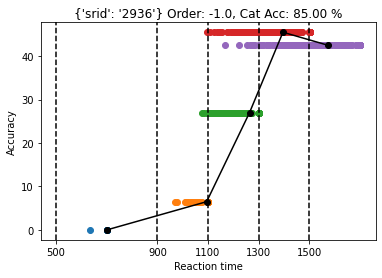

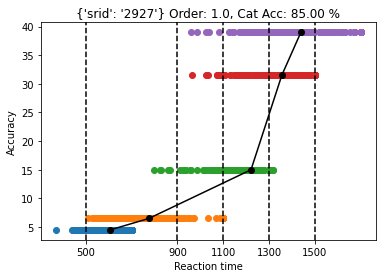

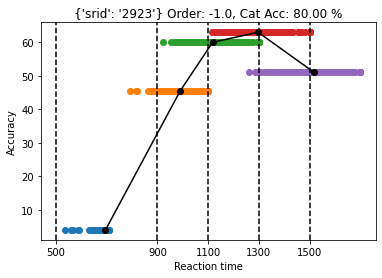

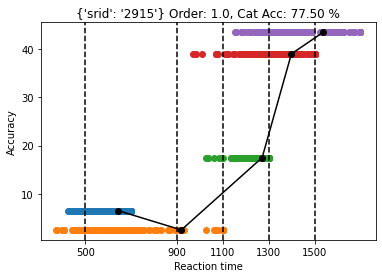

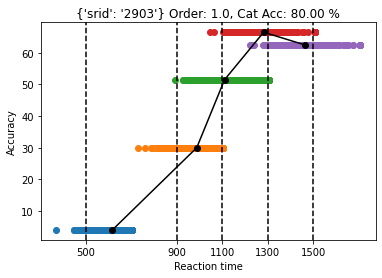

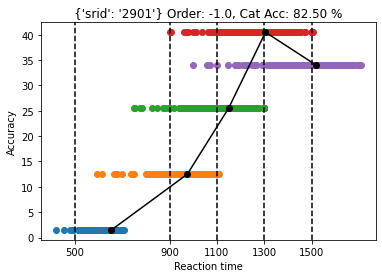

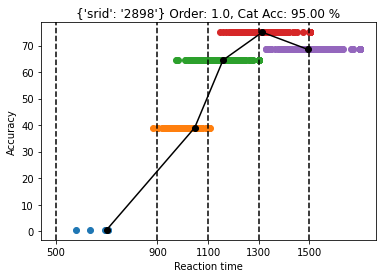

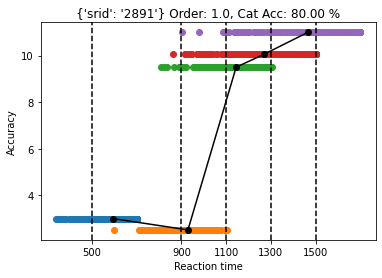

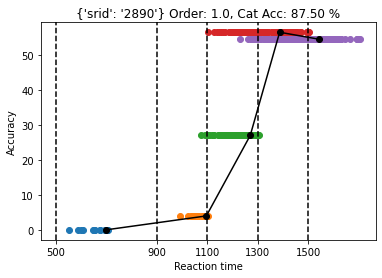

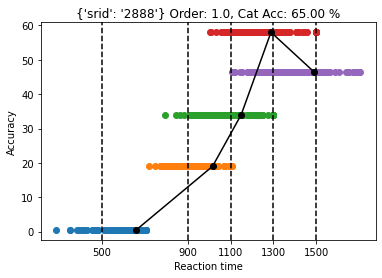

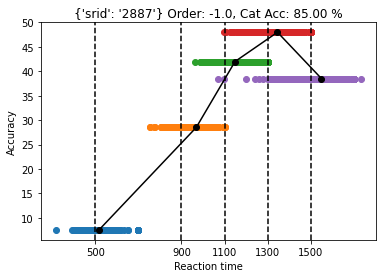

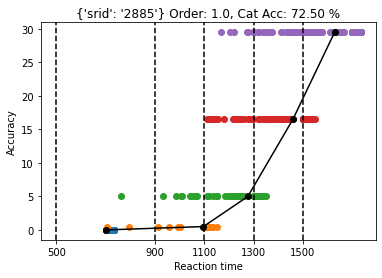

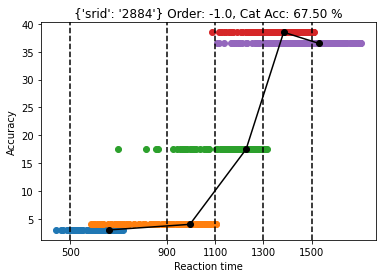

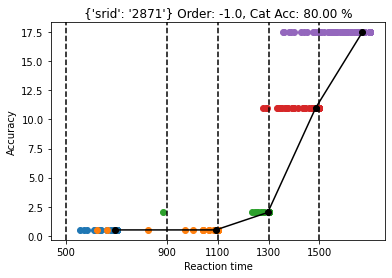

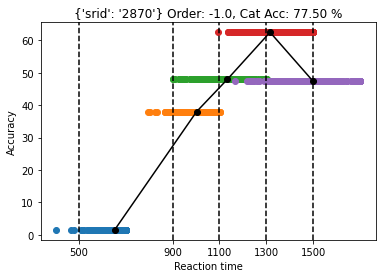

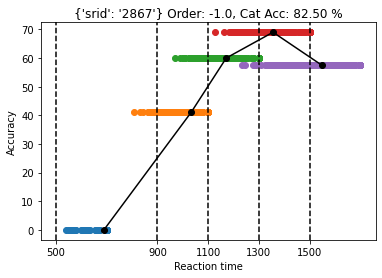

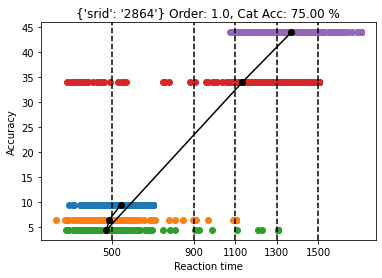

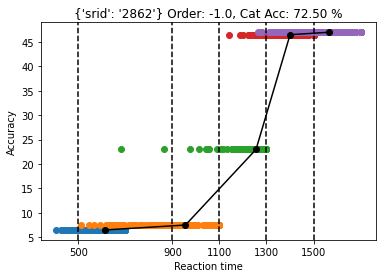

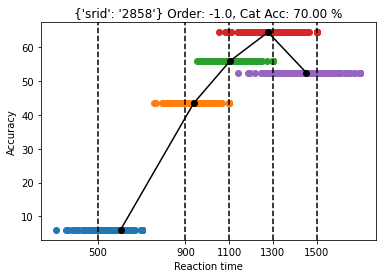

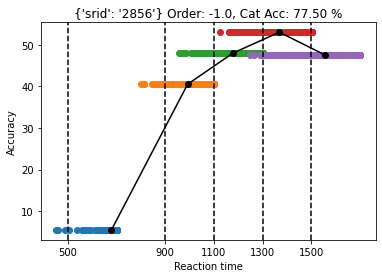

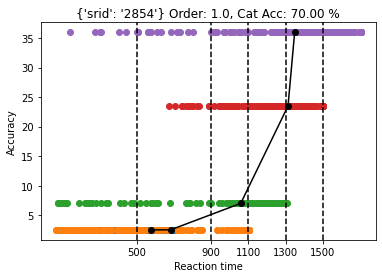

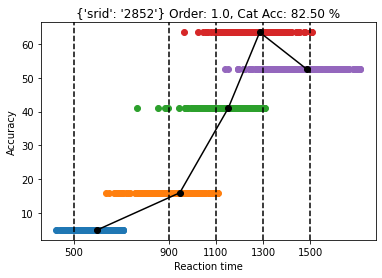

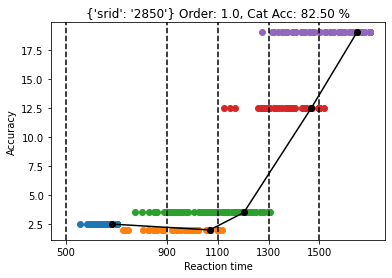

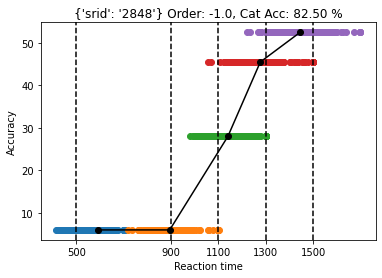

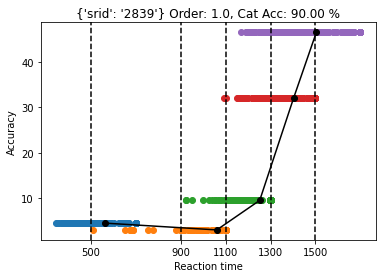

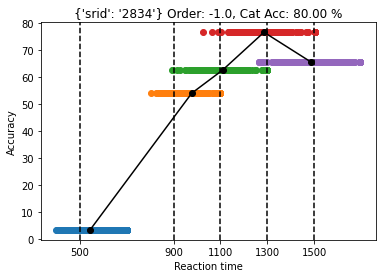

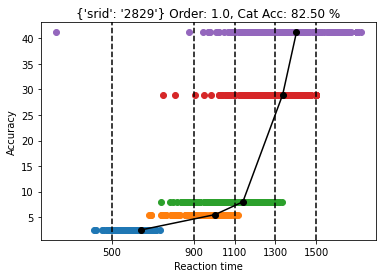

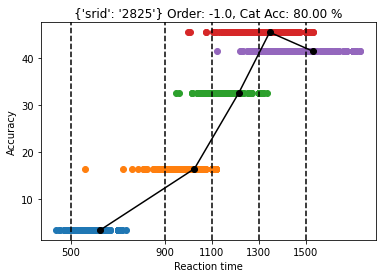

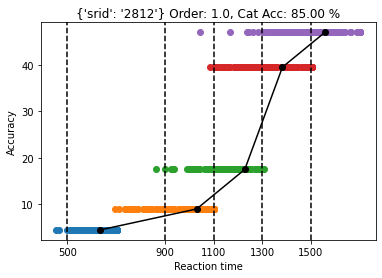

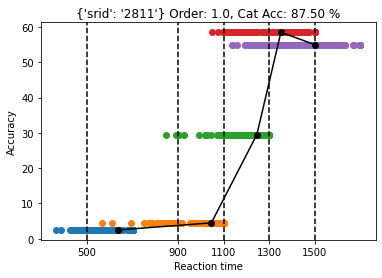

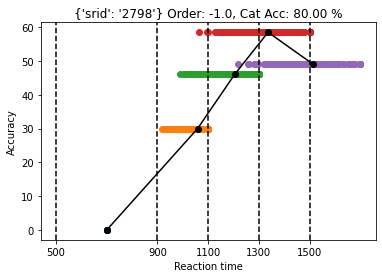

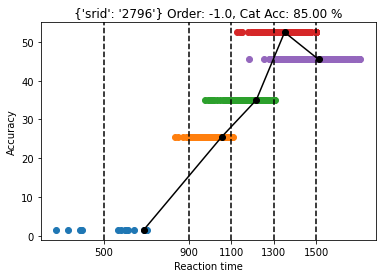

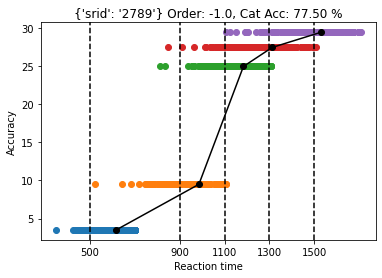

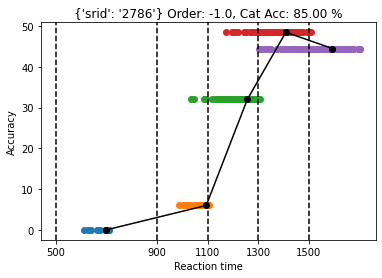

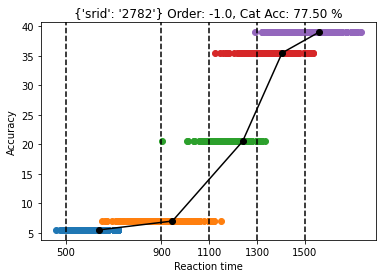

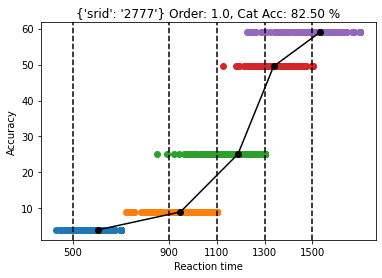

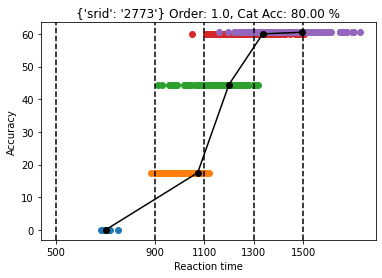

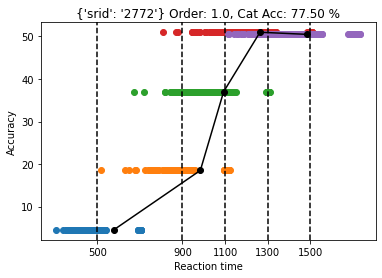

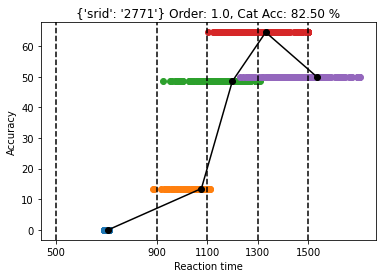

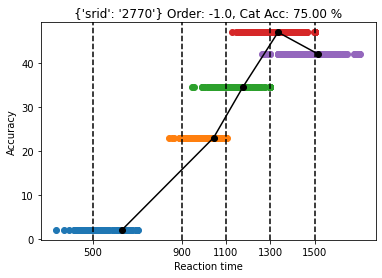

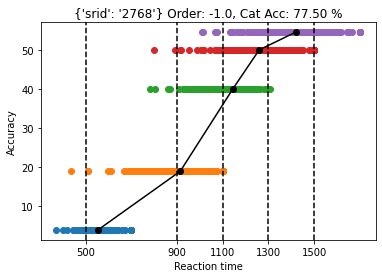

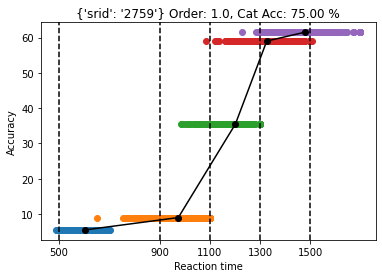

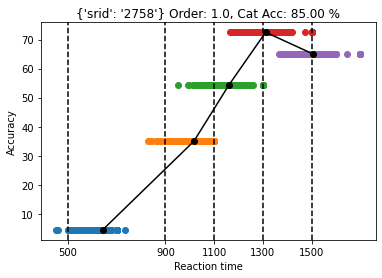

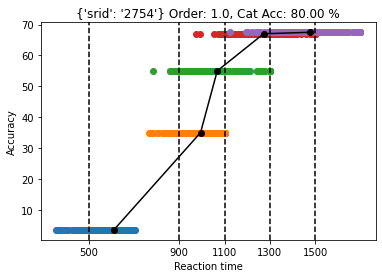

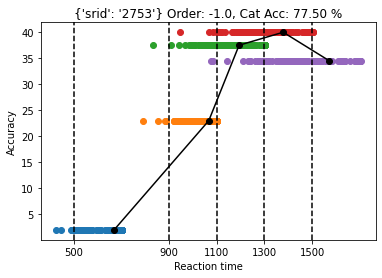

In [47]:
throw_out = list(map(str,[
	2784, 2795, 2805, 2807, 2821, 2828, 2809, 2815,
	2855, 2857, 2869, 2874, 2877, 2878, 2880, 2882, 2893, 2897, 2906, 2911, 2918, 2920
]))
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	if df['url'][0]['srid'] in throw_out:
		continue
	plt.figure()

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		plt.axvline(times[j], color='k', linestyle='--')
		
	plt.plot(mean_times, accs, 'ko-')
	# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
	plt.xlabel("Reaction time")
	plt.ylabel("Accuracy")
	# plt.yticks(range(0,110,10))
	plt.xticks(times)
	plt.title("{} Order: {}, Cat Acc: {:.2f} %".format(df['url'][0], df['order'][500], cat_accs[i]))

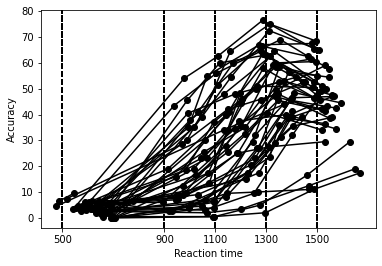

In [48]:
plt.figure()
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	if df['url'][0]['srid'] in throw_out:
		continue

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		plt.axvline(times[j], color='k', linestyle='--')
		
	plt.plot(mean_times, accs, 'ko-')
	# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
	plt.xlabel("Reaction time")
	plt.ylabel("Accuracy")
	# plt.yticks(range(0,110,10))
	plt.xticks(times)

Text(0.5, 1.0, 'Descending')

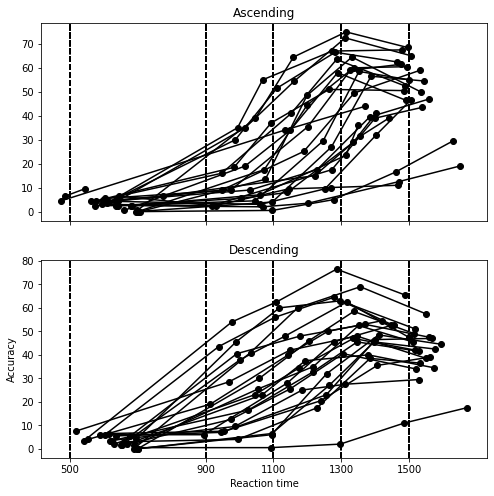

In [51]:
fig, axs = plt.subplots(2,1, figsize=(8,8), sharex=True)
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	if df['url'][0]['srid'] in throw_out:
		continue

	if df.iloc[500]['order'] == 1.0:
		ax = axs[0]	
	elif df.iloc[500]['order'] == -1.0:
		ax = axs[1]
	else:
		raise ValueError("Order not 1 or -1")

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		ax.axvline(times[j], color='k', linestyle='--')
		
	ax.plot(mean_times, accs, 'ko-')

# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
plt.xlabel("Reaction time")
plt.ylabel("Accuracy")
# plt.yticks(range(0,110,10))
plt.xticks(times)
axs[0].set_title("Ascending")
axs[1].set_title("Descending")

Text(0.5, 1.0, 'Descending')

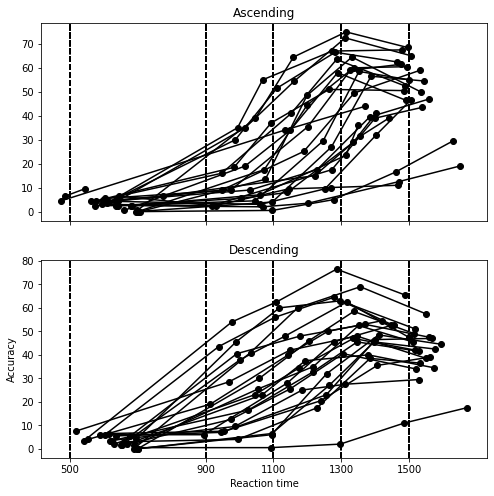

In [50]:
fig, axs = plt.subplots(2,1, figsize=(8,8), sharex=True)
for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
	if df['url'][0]['srid'] in throw_out:
		continue

	if df.iloc[500]['order'] == 1.0:
		ax = axs[0]	
	elif df.iloc[500]['order'] == -1.0:
		ax = axs[1]
	else:
		raise ValueError("Order not 1 or -1")

	accs = []
	mean_times = []
	for j, block in enumerate(blocks[1:]):
		acc = 100 * blocked_data[block]['correct'].sum() / len(blocked_data[block]['correct'])
		accs.append(acc)
		mean_times.append(np.mean(blocked_data[block]['duration']))

		# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
		ax.axvline(times[j], color='k', linestyle='--')
		
	ax.plot(mean_times, accs, 'ko-')

# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
plt.xlabel("Reaction time")
plt.ylabel("Accuracy")
# plt.yticks(range(0,110,10))
plt.xticks(times)
axs[0].set_title("Ascending")
axs[1].set_title("Descending")

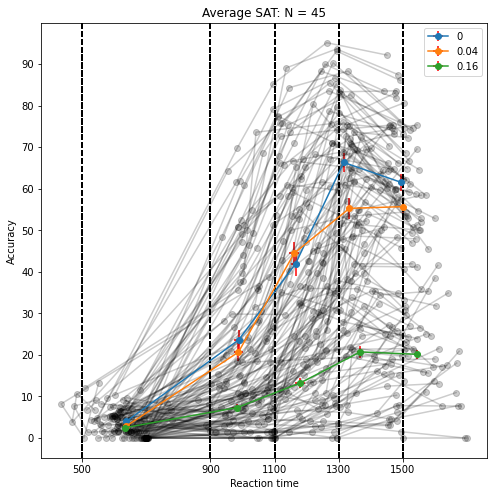

In [49]:
# PLOTTING MEAN SAT CURVE FOR MODES SEPARATELY
plt.figure(figsize=(8,8))
for mode in [0, 0.04, 0.16]:
	all_accs = []
	all_mean_times = []
	for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
		if df['url'][0]['srid'] in throw_out:
			continue

		accs = []
		mean_times = []
		for j, block in enumerate(blocks[1:]):
			mode_blocked_data = blocked_data[block].loc[blocked_data[block]['mode'] == mode]
			acc = 100 * mode_blocked_data['correct'].sum() / len(mode_blocked_data['correct'])
			accs.append(acc)
			mean_times.append(np.mean(mode_blocked_data['duration']))

		all_accs.append(accs)
		all_mean_times.append(mean_times)

	all_accs = np.array(all_accs)
	all_mean_times = np.array(all_mean_times)

	# COPIED FROM PREVIOUS CELL WHICH PLOTS ALL OBSERVERS SEPARATELY
	for i, (blocked_data, df) in enumerate(zip(blocked_datas, dfs)):
		if df['url'][0]['srid'] in throw_out:
			continue

		accs = []
		mean_times = []
		for j, block in enumerate(blocks[1:]):
			mode_blocked_data = blocked_data[block].loc[blocked_data[block]['mode'] == mode]
			acc = 100 * mode_blocked_data['correct'].sum() / len(mode_blocked_data['correct'])
			accs.append(acc)
			mean_times.append(np.mean(mode_blocked_data['duration']))

			# plt.scatter(blocked_data[block]['duration'], [acc]*len(blocked_data[block]), label=block) # 200 + mt
			plt.axvline(times[j], color='k', linestyle='--')
			
		plt.plot(mean_times, accs, 'ko-', alpha=0.2)
		# plt.axhline(y=cat_accs[i], color='k', linestyle='--')
		plt.xlabel("Reaction time")
		plt.ylabel("Accuracy")
		plt.yticks(range(0,110,10))
		plt.xticks(times)
		# plt.title(df['url'][0])

	plt.title("Average SAT: N = {}".format(len(dfs) - len(throw_out)))
	plt.errorbar(
		all_mean_times.mean(axis=0),
		all_accs.mean(axis=0),
		yerr=all_accs.std(axis=0)/np.sqrt(len(dfs)),
		xerr=all_mean_times.std(axis=0)/np.sqrt(len(dfs)),
		marker='o',
		linestyle = '-',
		# color='b',
		ecolor='r',
		label=mode)
plt.legend()
plt.show()

## 